In [1]:
conda install tensorflow keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - keras
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    keras-2.2.4                |           py37_1         492 KB  conda-forge
    libgpuarray-0.7.6          |    h14c3975_1003         263 KB  conda-forge
    mako-1.1.0                 |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    pygpu-0.7.6                |py37h3010b51_1000         683 KB  conda-forge
    theano-1.0.4               |py37hf484d3e_1000   

In [2]:
# Import Modeules and Dataset
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Toddler Autism dataset.csv")

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
# Print Dataset
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# Let's have a look how many values are missing.
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
ASD Traits                0
dtype: int64

In [6]:
#Lets have a look at the data and see identify Object/Categorical values and Continuous values
df.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
ASD Traits                object
dtype: object

In [7]:
# Convert convert the categorical columns to dummy variables.
feats = ['Sex','Ethnicity','Jaundice','Family_mem_with_ASD','ASD Traits']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [8]:
df_final.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes,ASD Traits_Yes
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
2,3,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,5,1,1,0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,1


In [9]:
# Drop Unnecessary columns
df_final.drop(['Case_No', 'Who completed the test','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'], axis = 1, inplace = True)
df_final.columns

Index(['Age_Mons', 'Qchat-10-Score', 'Sex_m', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Ethnicity_south asian',
       'Jaundice_yes', 'Family_mem_with_ASD_yes', 'ASD Traits_Yes'],
      dtype='object')

In [10]:
df_final.head()

,Age_Mons,Qchat-10-Score,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes,ASD Traits_Yes
0,28,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,36,4,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,36,4,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,24,10,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20,9,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Drop essential column that will be use for prediction.
X = df_final.drop(['ASD Traits_Yes'],axis=1).values
y = df_final['ASD Traits_Yes'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Transforming date -To scale the training set and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.49380655,  1.30559887,  0.64007734, ..., -0.2484207 ,
        -0.60155963, -0.43859103],
       [-1.88098261, -1.42801143, -1.56231121, ..., -0.2484207 ,
        -0.60155963, -0.43859103],
       [-0.49380655, -0.40290757,  0.64007734, ..., -0.2484207 ,
        -0.60155963, -0.43859103],
       ...,
       [-2.00708952,  0.96389758,  0.64007734, ..., -0.2484207 ,
        -0.60155963,  2.28002838],
       [ 0.76726259, -0.06120628,  0.64007734, ..., -0.2484207 ,
        -0.60155963, -0.43859103],
       [ 0.64115568, -0.06120628,  0.64007734, ..., -0.2484207 ,
        -0.60155963,  2.28002838]])

In [15]:
# Building the ANN -To import the Keras, Sequential, and Dense modules.
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
opt = adam(.006)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#use Sequential to initialize a linear stack of layers and create a classifier variable.
classifier = Sequential()

In [17]:
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 15))

In [18]:
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))

In [19]:
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))

In [20]:
# Adding output Layer to the Network
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [21]:
#Show model.
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Adding Gradient Discent to reduce error
classifier.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])

In [23]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [24]:
# Fit Classifier to the Data set
history = classifier.fit(X_train, y_train,callbacks=callbacks,validation_split=0.20, batch_size = 10, epochs = 30,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 674 samples, validate on 169 samples
Epoch 1/30
 - 1s - loss: 0.6073 - acc: 0.6780 - val_loss: 0.4323 - val_acc: 0.6864
Epoch 2/30
 - 0s - loss: 0.3061 - acc: 0.7685 - val_loss: 0.2347 - val_acc: 0.9704
Epoch 3/30
 - 0s - loss: 0.2040 - acc: 0.9777 - val_loss: 0.1796 - val_acc: 0.9882
Epoch 4/30
 - 0s - loss: 0.1619 - acc: 0.9837 - val_loss: 0.1433 - val_acc: 0.9882
Epoch 5/30
 - 0s - loss: 0.1312 - acc: 0.9896 - val_loss: 0.1203 - val_acc: 0.9882
Epoch 6/30
 - 0s - loss: 0.1105 - acc: 0.9896 - val_loss: 0.1035 - val_acc: 0.9882
Epoch 7/30
 - 0s - loss: 0.0961 - acc: 0.9896 - val_loss: 0.0921 - val_acc: 0.9882
Epoch 8/30
 - 0s - loss: 0.0850 - acc: 0.9896 - val_loss: 0.0830 - val_acc: 0.9882
Epoch 9/30
 - 0s - loss: 0.0760 - acc: 0.9896 - val_loss: 0.0780 - val_acc: 0.9882
Epoch 10/30
 - 0s - loss: 0.0698 - acc: 0.9896 - val_loss: 0.0701 - val_acc: 0.9882
Epoch 11/30
 - 0s - loss: 0.0651 - acc: 0.9896 - val_loss: 0.0661 - val_acc

In [25]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_pred = (y_pred > 0.5)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.957345971563981

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 58,   4],
       [  5, 144]])

In [30]:
# precision tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.972973


In [31]:
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.966443


In [32]:
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.969697


In [33]:
# kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.897700


In [34]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.950963


In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [36]:
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 15))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [37]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=30)

In [38]:
accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv = 10,n_jobs = -1)

Epoch 1/1
85/85 [==============================] - 0s 1ms/step
Epoch 1/1
85/85 [==============================] - 0s 947us/step
Epoch 1/1
85/85 [==============================] - 0s 1ms/step
Epoch 1/1
84/84 [==============================] - 0s 2ms/step
Epoch 1/1
84/84 [==============================] - 0s 2ms/step
Epoch 1/1
84/84 [==============================] - 0s 3ms/step
Epoch 1/1
84/84 [==============================] - 0s 3ms/step
Epoch 1/1
84/84 [==============================] - 0s 3ms/step
Epoch 1/1
84/84 [==============================] - 0s 4ms/step
Epoch 1/1
84/84 [==============================] - 0s 4ms/step


In [39]:
mean = accuracies.mean()
mean

0.9262885134385413

In [40]:
variance = accuracies.var()
variance

0.013012035613752155

In [41]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 15))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


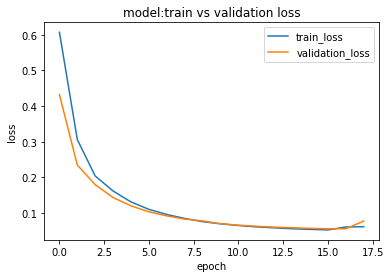

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model:train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')
plt.show()

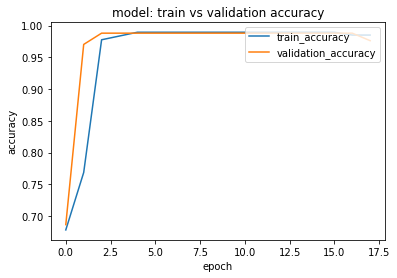

In [43]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model: train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='upper right')
plt.show()

In [44]:
#Grid search to experiment with different model parameters in order to obtain the ones for best accuracy. 
from sklearn.model_selection import GridSearchCV
def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim= 15))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [45]:
classifier = KerasClassifier(build_fn = make_classifier)

In [46]:
params = {
    'batch_size':[5,10],
    'epochs':[3,5],
    'optimizer':['adam','rmsprop']
}

In [47]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring="accuracy",
                           cv=2)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)

Epoch 1/3
421/421 [==============================] - 1s 4ms/step - loss: 0.6863 - acc: 0.6936
Epoch 2/3
421/421 [==============================] - 0s 1ms/step - loss: 0.6606 - acc: 0.7031
Epoch 3/3
421/421 [==============================] - 0s 976us/step - loss: 0.5628 - acc: 0.7031
Epoch 1/3
422/422 [==============================] - 2s 4ms/step - loss: 0.6880 - acc: 0.6659
Epoch 2/3
422/422 [==============================] - 0s 1ms/step - loss: 0.6680 - acc: 0.6706
Epoch 3/3
422/422 [==============================] - 0s 930us/step - loss: 0.5772 - acc: 0.6706
Epoch 1/3
421/421 [==============================] - 1s 3ms/step - loss: 0.6851 - acc: 0.7055
Epoch 2/3
421/421 [==============================] - 0s 944us/step - loss: 0.6588 - acc: 0.7031
Epoch 3/3
421/421 [==============================] - 0s 938us/step - loss: 0.5749 - acc: 0.7031
Epoch 1/3
422/422 [==============================] - 2s 4ms/step - loss: 0.6888 - acc: 0.6540
Epoch 2/3
422/422 [==============================] -

In [ ]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
best_param

In [ ]:
best_accuracy